# What to avoid when using MatPlotLib

## 1. Fonts and Font Sizes



Matplotlib defaults are terrible. What are they? 

For *a lot* of information, take a look at <https://matplotlib.org/users/customizing.html#matplotlib-rcparams>. 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
print(plt.rcParams)


_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.mencoder_args: []
animation.mencoder_path: mencoder
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.hold: None
axes.labelcolor: k
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#946

Don't bother memorising all of them. 

Let's grab some data to play with. This will give you an object that contains an astropy.table.Table with some pulsar data. We'll use this to demonstrate some types of plots. 


In [3]:
import numpy as np
import astropy
import psrqpy


In [17]:
c = psrqpy.QueryATNF(params=['p0','p1','dm','s1400','pb','minmass','binary'])
t = c.table()
print(t['P0'])


         P0         
         s          
--------------------
      0.115363568268
       0.69374767047
        0.3158731909
             2.55287
      1.240699038946
0.003050203104480002
   0.004554447383906
             0.00184
  0.0037046394947985
 0.00575677999551635
                 ...
      1.643622185327
      0.756899382059
      0.495369868028
 0.00288422674154723
              0.3033
               1.799
      1.181463382967
               1.164
            1.011691
      0.944783886655
Length = 2659 rows


Text(0.5,0,'Period (s)')

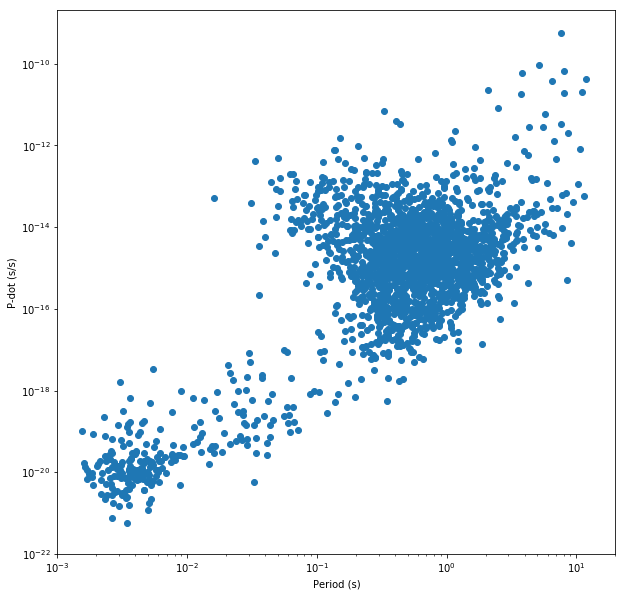

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(t['P0'],t['P1'])
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-22,2e-9)
plt.xlim(1e-3,2e1)
plt.ylabel('P-dot (s/s)')
plt.xlabel('Period (s)')


How do you change these parameters? There are a few different ways, but here's one example with my personal defaults: 

In [11]:
fontsize=18
plt.rc('text',usetex=True)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)
plt.rc('axes',labelsize=fontsize)
plt.rc('font',**{'family': 'serif','serif': ['Times']})


Much easier to read:


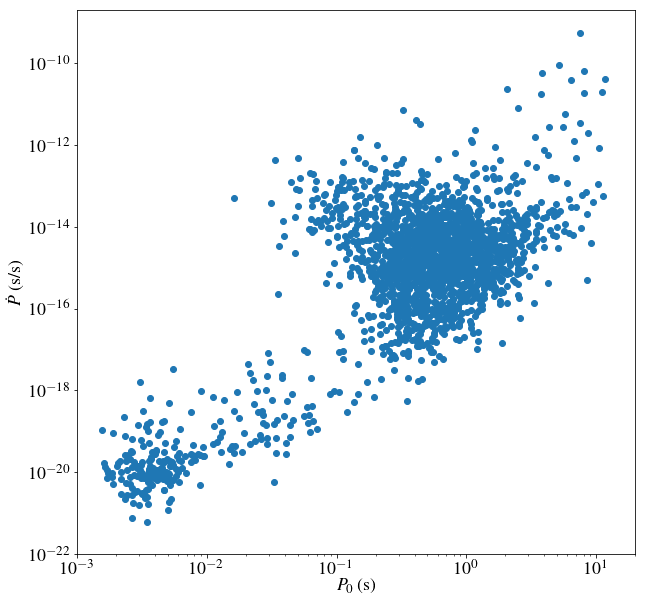

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(t['P0'],t['P1'])
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-22,2e-9)
plt.xlim(1e-3,2e1)
plt.ylabel('$\dot P$ (s/s)')
plt.xlabel('$P_0$ (s)')
print("Much easier to read:")


What about using a colormap to show a third parameter? The default colormap is (now) viridis, which is good, but you may want to use something different. There are lots of options here: <https://matplotlib.org/users/colormaps.html>. 

Text(0.5,0,'$P_0$ (s)')

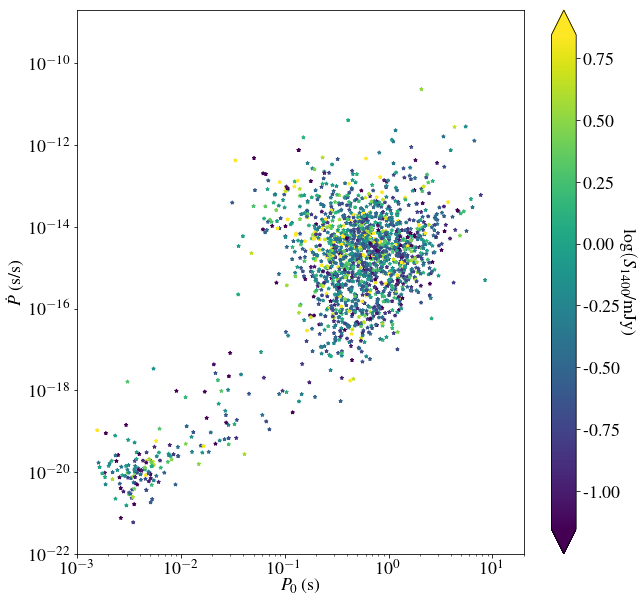

In [19]:
# Use Flux Density (S1400) as colorbar
mask = t['S1400'] > 0 # S1400 not defined for all objects
smin = np.percentile(np.log10(t[mask]['S1400']),5)
smax = np.percentile(np.log10(t[mask]['S1400']),95)

fig = plt.figure(num=1,figsize=(10,10))
ln = mpl.colors.Normalize(vmin=smin,vmax=smax) #set colorbar normalisation

p = plt.scatter(t[mask]['P0'],t[mask]['P1'],c=np.log10(t[mask]['S1400']),
                norm=ln,s=12,marker=u'*',edgecolors='face')
ax = fig.gca()
cb = fig.colorbar(p,ax=ax,format='%.2f',extend='both')
cb.set_label('$\log(S_{1400}$/mJy)', rotation=270, size=fontsize, labelpad=15)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-22,2e-9)
ax.set_xlim(1e-3,2e1)
ax.set_ylabel('$\dot P$ (s/s)')
ax.set_xlabel('$P_0$ (s)')


## 2. Distinguishable Points
If you have different populations, or types of data, to include in a plot, how do you make the points distinguishable? For this data, there are different types of binary systems, so we can plot them. 

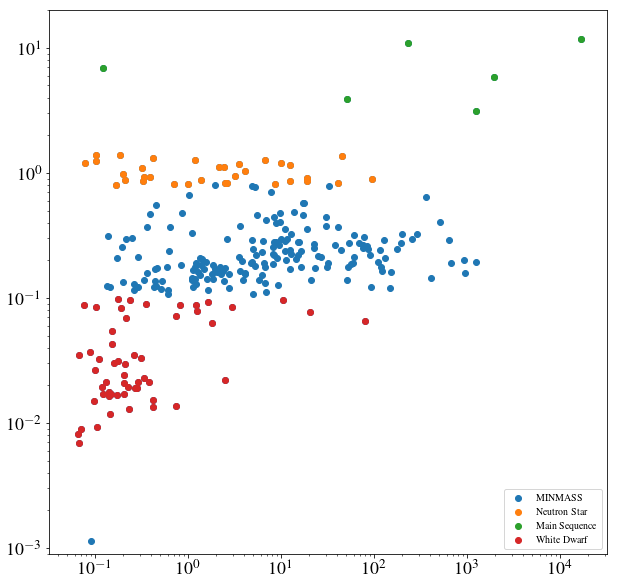

In [26]:
lim1 = np.logical_and(t['MINMASS'] > 0.8, t['MINMASS'] < 1.5)
lim2 = t['MINMASS'] > 1.5
lim3 = np.logical_and(t['MINMASS'] > 5e-3, t['MINMASS'] < 1e-1)

fig = plt.figure(num=1,figsize=(10,10))
plt.scatter(t['PB'],t['MINMASS'])
plt.scatter(t[lim1]['PB'],t[lim1]['MINMASS'],label='Neutron Star')
plt.scatter(t[lim2]['PB'],t[lim2]['MINMASS'],label='Main Sequence')
plt.scatter(t[lim3]['PB'],t[lim3]['MINMASS'],label='White Dwarf')
plt.yscale('log')
plt.xscale('log')
plt.ylim(9e-4,2e1)
plt.legend()


# Appendix 1. Some Resources

<http://colororacle.org/>

<http://colorbrewer2.org/>

<http://www.vischeck.com>
